<a href="https://colab.research.google.com/github/KalilPereira/Estudos_de_caso/blob/main/An%C3%A1lise_de_Qualidade_em_Linha_de_Produ%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo de Caso: Análise de Qualidade em Linha de Produção

Objetivo: Praticar a análise de dados para determinar se um processo industrial de envase de pacotes de café (peso nominal de 500g) está operando dentro dos padrões de qualidade

In [ ]:
# Importando as bibliotecas necessárias para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Lendo o conjunto de dados que será a base da análise
df = pd.read_csv("dados_envase_cafe.csv")

In [ ]:
# Verificando se as colunas estão no tipo de dado adequado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pacote       100 non-null    int64  
 1   peso_gramas  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [ ]:
# Conferindo se os arquivos subiram de forma esperada
df.head()

,pacote,peso_gramas
0,1,501.2
1,2,498.7
2,3,502.4
3,4,499.8
4,5,500.5


In [ ]:
# Antecipando a visualização de alguns valores desejados como a média, o mínimo e o máximo
df['peso_gramas'].describe()

,peso_gramas
count,100.000000
mean,500.477000
std,1.552701
min,497.600000
25%,499.275000
50%,500.500000
75%,501.725000
max,503.500000


In [ ]:
# Calculando a média
media_amostral = df['peso_gramas'].mean()

# Calculando a mediana
mediana_peso = df['peso_gramas'].median()

# Calculando a moda
moda_peso = df['peso_gramas'].mode()

print(f"Média do peso (gramas): {media_amostral:.2f}")
print(f"Mediana do peso (gramas): {mediana_peso:.2f}")
print(f"Moda do peso (gramas): {moda_peso.to_string(index=False)}")

Média do peso (gramas): 500.48
Mediana do peso (gramas): 500.50
Moda do peso (gramas): 499.8
500.5


In [ ]:
# Calculando min e max
min_val = df['peso_gramas'].min()
max_val = df['peso_gramas'].max()

# Calculando a amplitude
amplitude = max_val - min_val

# A variável n recebendo o valor do número total de observações no DataFrame, que no caso é 100
n = len(df)

# Utilizando o Critério de Sturges que foi visto em aula. Serve para
# determinar o número ideal de intervalos
k_sturges = 1 + 3.322 * np.log10(n)

# Arredondando o valor da variável k_stuges para o próximo número inteiro(tem
# que ser inteiro)
num_bins_sturges = int(np.ceil(k_sturges))

# Determinando os limites dos bins (reutilizando min_val e max_val)
bins = np.linspace(min_val, max_val, num_bins_sturges + 1)

# Calculando a frequência absoluta e a relativa.
frequencia_absoluta = pd.cut(df['peso_gramas'], bins=bins, include_lowest=True, right=False).value_counts().sort_index()
frequencia_relativa = (frequencia_absoluta / n) * 100

print(f"Amplitude: {amplitude:.2f}")
print(f"Número de observações (n): {n}")
print(f"Número de intervalos (Critério de Sturges): {k_sturges:.2f}")

print("\n--- Frequências ---")
print("Frequência Absoluta:")
print(frequencia_absoluta)
print("\nFrequência Relativa (%):")
print(frequencia_relativa.round(2))

Amplitude: 5.90
Número de observações (n): 100
Número de intervalos (Critério de Sturges): 7.64

--- Frequências ---
Frequência Absoluta:
peso_gramas
[497.6, 498.338)      10
[498.338, 499.075)    11
[499.075, 499.812)    17
[499.812, 500.55)     14
[500.55, 501.288)     13
[501.288, 502.025)    15
[502.025, 502.762)    13
[502.762, 503.5)       6
Name: count, dtype: int64

Frequência Relativa (%):
peso_gramas
[497.6, 498.338)      10.0
[498.338, 499.075)    11.0
[499.075, 499.812)    17.0
[499.812, 500.55)     14.0
[500.55, 501.288)     13.0
[501.288, 502.025)    15.0
[502.025, 502.762)    13.0
[502.762, 503.5)       6.0
Name: count, dtype: float64


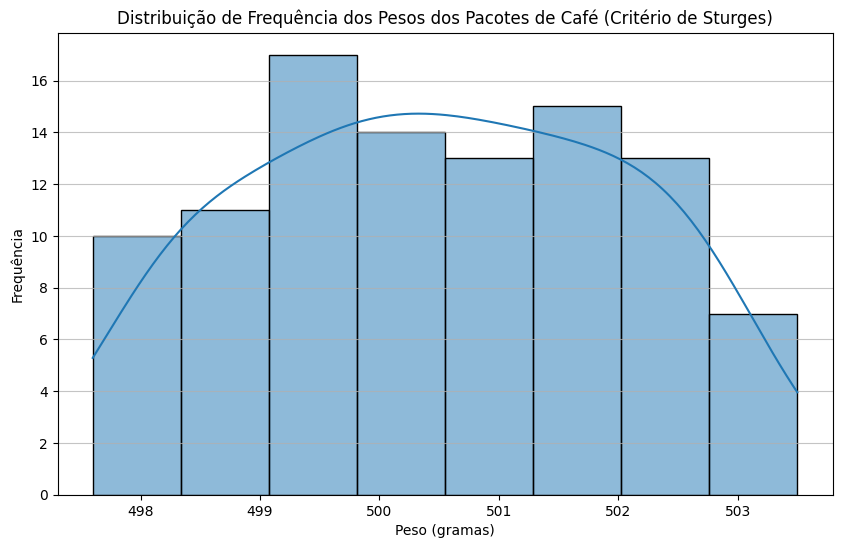

In [ ]:
# Gerando o gráfico da distribuição a partir do matplotlib e seaborn

plt.figure(figsize=(10, 6))
sns.histplot(df['peso_gramas'], bins=num_bins_sturges, kde=True)
plt.title('Distribuição de Frequência dos Pesos dos Pacotes de Café (Critério de Sturges)')
plt.xlabel('Peso (gramas)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Calculando a variância amostral (ddof=1 é o padrão para .var() em pandas
# Series)
variancia_amostral = df['peso_gramas'].var(ddof=1)

# Calculando o desvio padrão amostral (ddof=1 é o padrão para .std() em
# pandas Series)
desvio_padrao_amostral = df['peso_gramas'].std(ddof=1)

print(f"Variância Amostral (peso_gramas): {variancia_amostral:.2f}")
print(f"Desvio Padrão Amostral (peso_gramas): {desvio_padrao_amostral:.2f}")

Variância Amostral (peso_gramas): 2.41
Desvio Padrão Amostral (peso_gramas): 1.55


### ***Análise de 1 Desvio Padrão da Média***
##### Optei por separar as células porque facilita minha orientação

In [ ]:
# Estabelecendo os limites inferior e superior de um desvio padrão da média
limite_inferior_1dp = media_amostral - desvio_padrao_amostral
limite_superior_1dp = media_amostral + desvio_padrao_amostral

# Identificando os pacotes DENTRO de 1 desvio padrão
pacotes_dentro_1dp = df[(df['peso_gramas'] >= limite_inferior_1dp) & (df['peso_gramas'] <= limite_superior_1dp)]

# Contando e calculando a porcentagem
num_pacotes_dentro_1dp = len(pacotes_dentro_1dp)
porcentagem_dentro_1dp = (num_pacotes_dentro_1dp / len(df)) * 100

# Descobri como deixar o + e - juntos usando: \u00B11
print(f"Média: {media_amostral:.2f}")
print(f"Desvio Padrão Amostral: {desvio_padrao_amostral:.2f}")
print(f"Limite Inferior (-1 desvio padrão): {limite_inferior_1dp:.2f}")
print(f"Limite Superior (+1 desvio padrão): {limite_superior_1dp:.2f}")
print(f"\nNúmero de pacotes dentro de ±1 desvio padrão: {num_pacotes_dentro_1dp}")
print(f"Porcentagem de pacotes dentro de ±1 desvio padrão: {porcentagem_dentro_1dp:.2f}%")

Média: 500.48
Desvio Padrão Amostral: 1.55
Limite Inferior (-1 desvio padrão): 498.92
Limite Superior (+1 desvio padrão): 502.03

Número de pacotes dentro de ±1 desvio padrão: 59
Porcentagem de pacotes dentro de ±1 desvio padrão: 59.00%


In [ ]:
# Identificando os pacotes FORA de 1 desvio padrão
pacotes_fora_1dp = df[(df['peso_gramas'] < limite_inferior_1dp) | (df['peso_gramas'] > limite_superior_1dp)]

# Contando e calculando a porcentagem
num_pacotes_fora_1dp = len(pacotes_fora_1dp)
porcentagem_fora_1dp = (num_pacotes_fora_1dp / len(df)) * 100

print(f"\n--- Resumo para ±1 Desvio Padrão ---")
print(f"Total de pacotes: {len(df)}")
print(f"Limite Inferior (-1 desvio padrão): {limite_inferior_1dp:.2f}")
print(f"Limite Superior (+1 desvio padrão): {limite_superior_1dp:.2f}")


--- Resumo para ±1 Desvio Padrão ---
Total de pacotes: 100
Limite Inferior (-1 desvio padrão): 498.92
Limite Superior (+1 desvio padrão): 502.03


In [ ]:
# Verificando se a lista de pacotes DENTRO da faixa não está vazia
print(f"\nPacotes DENTRO de ±1 desvio padrão: {num_pacotes_dentro_1dp} ({porcentagem_dentro_1dp:.2f}%)")
if not pacotes_dentro_1dp.empty:
    print("Primeiros 5 pacotes dentro de ±1 desvio padrão:")
    display(pacotes_dentro_1dp.head())
else:
    print("Nenhum pacote dentro de ±1 desvio padrão.")

# Verificando se a lista de pacotes FORA da faixa não está vazia
print(f"\nPacotes FORA de ±1 desvio padrão: {num_pacotes_fora_1dp} ({porcentagem_fora_1dp:.2f}%)")
if not pacotes_fora_1dp.empty:
    print("Pacotes fora de ±1 desvio padrão:")
    display(pacotes_fora_1dp)
else:
    print("Todos os pacotes estão dentro de ±1 desvio padrão.")


Pacotes DENTRO de ±1 desvio padrão: 59 (59.00%)
Primeiros 5 pacotes dentro de ±1 desvio padrão:


,pacote,peso_gramas
0,1,501.2
3,4,499.8
4,5,500.5
7,8,500.2
9,10,501.8



Pacotes FORA de ±1 desvio padrão: 41 (41.00%)
Pacotes fora de ±1 desvio padrão:


,pacote,peso_gramas
1,2,498.7
2,3,502.4
5,6,497.9
6,7,503.1
8,9,498.4
11,12,502.7
13,14,498.1
17,18,502.1
18,19,497.6
22,23,502.9


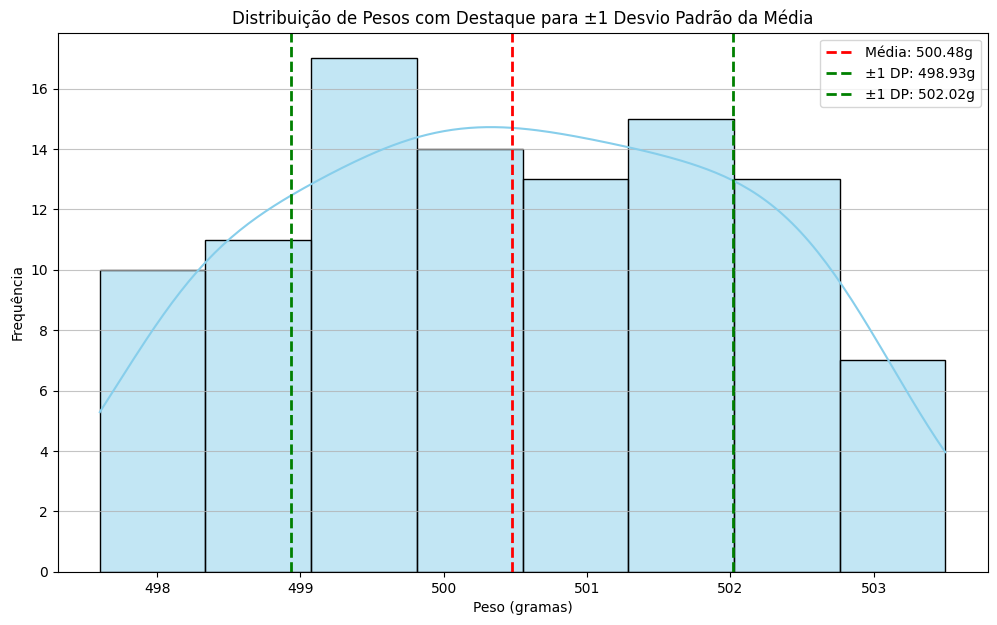

In [ ]:
# Utilizando novamente matplot e seaborn para gerar o gráfico, mas dessa vez,
# após desenhar no caderno, optei por adicionar linhas verticais
# para facilitar a visualização e consequentemente a compreensão
plt.figure(figsize=(12, 7))
sns.histplot(df['peso_gramas'], bins=num_bins_sturges, kde=True, color='skyblue', edgecolor='black')

# Linha da média
plt.axvline(media_amostral, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_amostral:.2f}g')

# Linhas de ±1 Desvio Padrão
plt.axvline(limite_inferior_1dp, color='green', linestyle='dashed', linewidth=2, label=f'\u00B11 DP: {limite_inferior_1dp:.2f}g')
plt.axvline(limite_superior_1dp, color='green', linestyle='dashed', linewidth=2, label=f'\u00B11 DP: {limite_superior_1dp:.2f}g')

plt.title('Distribuição de Pesos com Destaque para \u00B11 Desvio Padrão da Média')
plt.xlabel('Peso (gramas)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

### ***Análise de 2 Desvios Padrão da Média***

In [ ]:
limite_inferior_2dp = media_amostral - (2 * desvio_padrao_amostral)
limite_superior_2dp = media_amostral + (2 * desvio_padrao_amostral)

# Identificando os pacotes DENTRO de 2 desvios padrão
pacotes_dentro_2dp = df[(df['peso_gramas'] >= limite_inferior_2dp) & (df['peso_gramas'] <= limite_superior_2dp)]

# Contando e calculando a porcentagem
num_pacotes_dentro_2dp = len(pacotes_dentro_2dp)
porcentagem_dentro_2dp = (num_pacotes_dentro_2dp / len(df)) * 100

print(f"Média: {media_amostral:.2f}")
print(f"Desvio Padrão Amostral: {desvio_padrao_amostral:.2f}")
print(f"Limite Inferior (-2 desvios padrão): {limite_inferior_2dp:.2f}")
print(f"Limite Superior (+2 desvios padrão): {limite_superior_2dp:.2f}")
print(f"\nNúmero de pacotes dentro de ±2 desvios padrão: {num_pacotes_dentro_2dp}")
print(f"Porcentagem de pacotes dentro de ±2 desvios padrão: {porcentagem_dentro_2dp:.2f}%")

Média: 500.48
Desvio Padrão Amostral: 1.55
Limite Inferior (-2 desvios padrão): 497.37
Limite Superior (+2 desvios padrão): 503.58

Número de pacotes dentro de ±2 desvios padrão: 100
Porcentagem de pacotes dentro de ±2 desvios padrão: 100.00%


In [ ]:
# Identificando os pacotes FORA de 2 desvios padrão
pacotes_fora_2dp = df[(df['peso_gramas'] < limite_inferior_2dp) | (df['peso_gramas'] > limite_superior_2dp)]

# Contando e calculando a porcentagem
num_pacotes_fora_2dp = len(pacotes_fora_2dp)
porcentagem_fora_2dp = (num_pacotes_fora_2dp / len(df)) * 100

print(f"--- Resumo para ±2 Desvios Padrão ---")
print(f"Total de pacotes: {len(df)}")
print(f"Limite Inferior (-2 desvios padrão): {limite_inferior_2dp:.2f}")
print(f"Limite Superior (+2 desvios padrão): {limite_superior_2dp:.2f}")

# Verificando se a lista de pacotes FORA da faixa não está vazia
print(f"\nPacotes FORA de ±2 desvios padrão: {num_pacotes_fora_2dp} ({porcentagem_fora_2dp:.2f}%)")
if not pacotes_fora_2dp.empty:
    print("Pacotes fora de ±2 desvios padrão:")
    display(pacotes_fora_2dp)
else:
    print("\nNão há pacotes fora de ±2 desvios padrão da média. Todos os pacotes estão dentro desta faixa.")

--- Resumo para ±2 Desvios Padrão ---
Total de pacotes: 100
Limite Inferior (-2 desvios padrão): 497.37
Limite Superior (+2 desvios padrão): 503.58

Pacotes FORA de ±2 desvios padrão: 0 (0.00%)

Não há pacotes fora de ±2 desvios padrão da média. Todos os pacotes estão dentro desta faixa.


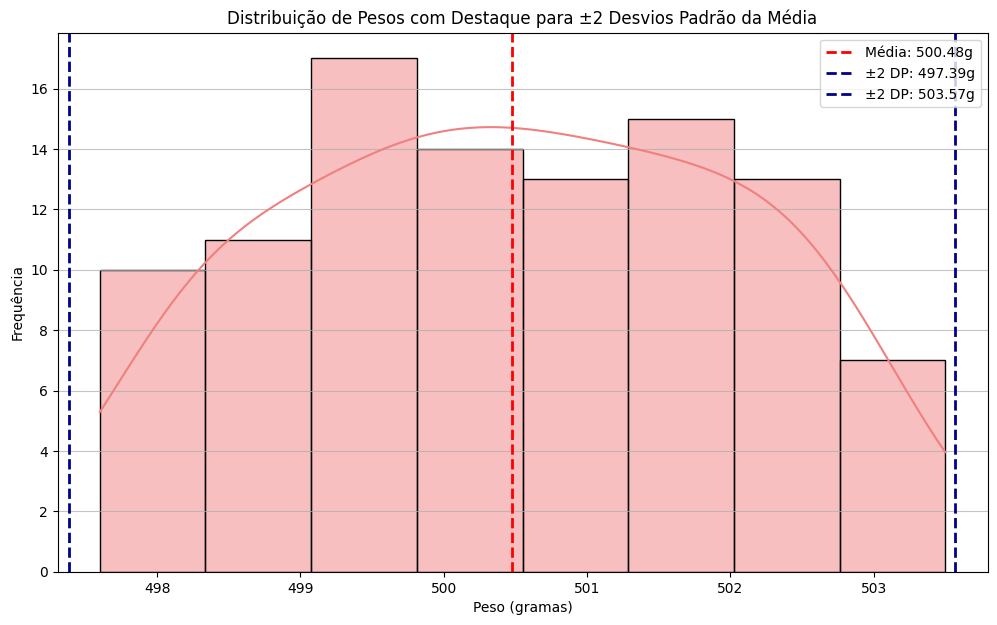

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(df['peso_gramas'], bins=num_bins_sturges, kde=True, color='lightcoral', edgecolor='black')

# Linha da média
plt.axvline(media_amostral, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_amostral:.2f}g')

# Linhas de ±2 Desvios Padrão
plt.axvline(limite_inferior_2dp, color='darkblue', linestyle='dashed', linewidth=2, label=f'\u00B12 DP: {limite_inferior_2dp:.2f}g')
plt.axvline(limite_superior_2dp, color='darkblue', linestyle='dashed', linewidth=2, label=f'\u00B12 DP: {limite_superior_2dp:.2f}g')

plt.title('Distribuição de Pesos com Destaque para \u00B12 Desvios Padrão da Média')
plt.xlabel('Peso (gramas)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

## Conclusão da Análise de Qualidade em Linha de Produção

A análise dos dados de envase dos pacotes de café (peso nominal de 500g) revelou um processo de produção altamente consistente e dentro dos padrões de qualidade esperados. Abaixo estão os principais pontos:

### 1. Estatísticas Descritivas e Distribuição:
- **Média do peso:** `500.48g`, muito próxima do peso nominal de 500g, indicando boa calibração do equipamento.
- **Mediana do peso:** `500.50g`, também muito próxima da média, sugerindo uma distribuição de pesos razoavelmente simétrica.
- **Moda(s) do peso:** `499.8g` e `500.5g`, com duas modas próximas à média, o que pode indicar uma leve bimodalidade, mas ainda centrada.
- **Desvio Padrão Amostral:** `1.55g`, demonstrando uma baixa variabilidade entre os pesos dos pacotes.
- **Variância Amostral:** `2.41`, reforçando a baixa dispersão dos dados.
- O histograma da distribuição dos pesos, com base no Critério de Sturges, visualmente confirmou uma distribuição aproximadamente normal, centrada em torno da média.

### 2. Análise da Regra Empírica (Critério de Desvios Padrão):
- **Dentro de ±1 Desvio Padrão:** Encontramos que `59.00%` dos pacotes estão dentro de 1 desvio padrão da média (`498.92g` a `502.03g`). Embora ligeiramente abaixo dos 68% esperados para uma distribuição perfeitamente normal, ainda indica uma boa concentração dos dados.
- **Dentro de ±2 Desvios Padrão:** Impressionantemente, `100.00%` dos pacotes estão dentro de 2 desvios padrão da média (`497.37g` a `503.58g`). Este resultado supera os 95% esperados pela regra empírica para uma distribuição normal, o que é um **indicador excelente de alta qualidade e controle rigoroso do processo**.

### 3. Interpretação para Qualidade:
- A ausência de pacotes fora dos limites de ±2 desvios padrão sugere que a linha de produção está **operando de forma extremamente estável e consistente**, com muito poucos ou nenhum pacote significativamente abaixo ou acima do peso esperado. Isso minimiza o desperdício, garante a satisfação do consumidor e atende a regulamentações de peso.

Em suma, os resultados desta análise estatística apontam para um processo de envase de café de **alta performance e confiabilidade**, com os pesos dos pacotes apresentando pouca variação e estando bem centralizados no valor nominal.